In [1]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/85/15/cf99a373812d37f8ae99752a34a9f5f690d820ceb5b302e922705bc18944/tensorflow-2.15.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for tensorflow-macos==2.15.0 from https://files.pythonhosted.org/packages/eb/9f/0759e2fea4a3c48f070b64811c2c57036b46353ba87263afc810b8f4188a/tensorflow_macos-2.15.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 from https://files.pythonhosted

  Obtaining dependency information for tensorboard-data-server<0.8.0,>=0.7.0 from https://files.pythonhosted.org/packages/7a/13/e503968fefabd4c6b2650af21e110aa8466fe21432cd7c43a84577a89438/tensorboard_data_server-0.7.2-py3-none-any.whl.metadata
  Obtaining dependency information for cachetools<6.0,>=2.0.0 from https://files.pythonhosted.org/packages/a2/91/2d843adb9fbd911e0da45fbf6f18ca89d07a087c3daa23e955584f90ebf4/cachetools-5.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for rsa<5,>=3.1.4 from https://files.pythonhosted.org/packages/49/97/fa78e3d2f65c02c8e1268b9aba606569fe97f6c8f7c2d74394553347c145/rsa-4.9-py3-none-any.whl.metadata
  Obtaining dependency information for oauthlib>=3.0.0 from https://files.pythonhosted.org/packages/7e/80/cab10959dc1faead58dc8384a781dfbf93cb4d33d50988f7a69f1b7c9bbe/oauthlib-3.2.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.8/208.8 MB 1.2 MB/s eta 0:00:0000:0100:04m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
X_train[6].shape

(28, 28)

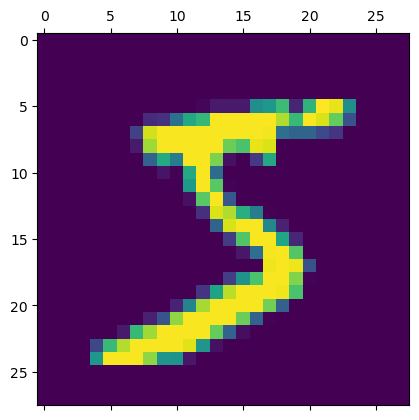

In [5]:
plt.matshow(X_train[0])

In [6]:
y_train[0]

5

In [7]:
X_train = X_train / 255
X_test = X_test / 255      ## scaling to achieve accuracy 

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 532us/step - loss: 0.2747 - accuracy: 0.9217
Epoch 2/10
1875/1875 [==============================] - 1s 526us/step - loss: 0.1248 - accuracy: 0.9631
Epoch 3/10
1875/1875 [==============================] - 1s 530us/step - loss: 0.0877 - accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 1s 543us/step - loss: 0.0674 - accuracy: 0.9791
Epoch 5/10
1875/1875 [==============================] - 1s 527us/step - loss: 0.0527 - accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 1s 525us/step - loss: 0.0433 - accuracy: 0.9869
Epoch 7/10
1875/1875 [==============================] - 1s 513us/step - loss: 0.0353 - accuracy: 0.9892
Epoch 8/10
1875/1875 [==============================] - 1s 524us/step - loss: 0.0283 - accuracy: 0.9913
Epoch 9/10
1875/1875 [==============================] - 1s 513us/step - loss: 0.0242 - accuracy: 0.9924
Epoch 10/10
1875/1875 [==============================] - 1s 522u

In [9]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 375us/step - loss: 0.0894 - accuracy: 0.9750


[0.08937589824199677, 0.9750000238418579]

313/313 [==============================] - 0s 316us/step


Text(95.72222222222221, 0.5, 'Truth')

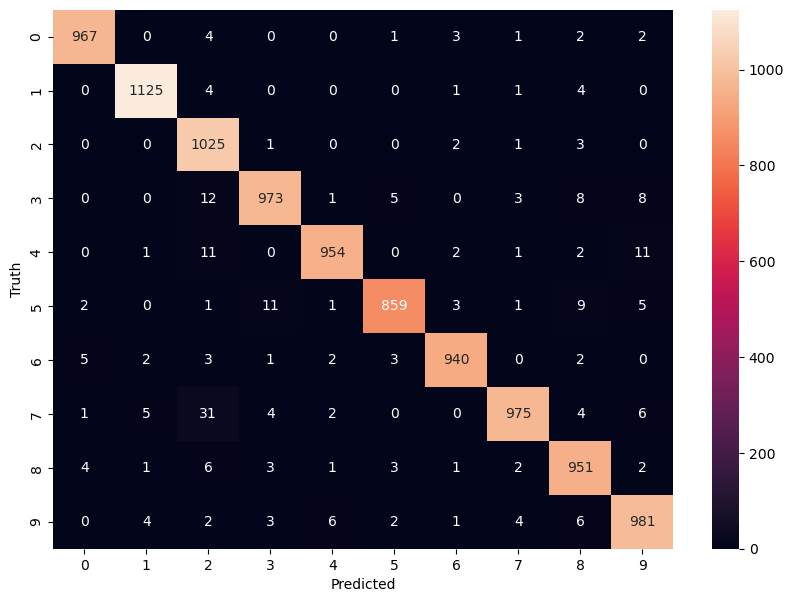

In [10]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [12]:
### Exercise Using CNN
from tensorflow.keras import datasets, layers, models


In [20]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

In [ ]:
model = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [21]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 1s 545us/step - loss: 0.0189 - accuracy: 0.9941
Epoch 2/5
1875/1875 [==============================] - 1s 529us/step - loss: 0.0132 - accuracy: 0.9961
Epoch 3/5
1875/1875 [==============================] - 1s 526us/step - loss: 0.0135 - accuracy: 0.9954
Epoch 4/5
1875/1875 [==============================] - 1s 531us/step - loss: 0.0105 - accuracy: 0.9969
Epoch 5/5
1875/1875 [==============================] - 1s 533us/step - loss: 0.0091 - accuracy: 0.9975


In [22]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1309 - accuracy: 0.9609
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0434 - accuracy: 0.9863
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0297 - accuracy: 0.9903
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0212 - accuracy: 0.9930
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0165 - accuracy: 0.9951
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0140 - accuracy: 0.9954
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0099 - accuracy: 0.9966
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0079 - accuracy: 0.9974
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0070 - accuracy: 0.9975
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

In [23]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)